<a href="https://colab.research.google.com/github/Avinashpv87/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

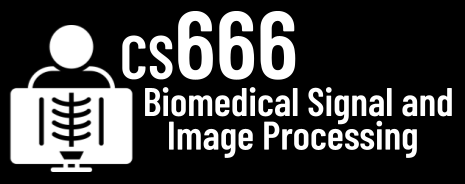

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [22]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [23]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [24]:
SAMPLING_RATE = metadata["sampling_rate"] ### TODO!
SECONDS = (len(signal) - 1) / metadata["sampling_rate"] ### TODO!

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

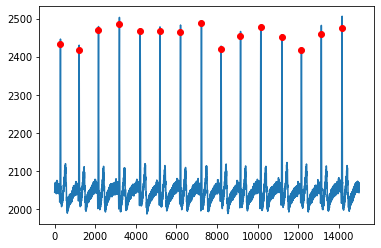

In [25]:
### TODO
from biosppy.signals import ecg
import matplotlib.pyplot as plt
out = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)
plt.plot(signal)
plt.plot(out['rpeaks'], signal[out['rpeaks']], 'ro')
plt.show()

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

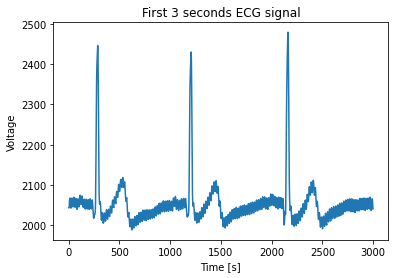

In [26]:
### TODO plot unfiltered signal
# ind = SAMPLING_RATE * SECONDS
# unfiltered = signal[:ind]

unfiltered = signal[:int(3 * SAMPLING_RATE)]

# First 3 seconds of the filtered signal
filtered = out['filtered'][:int(3 * SAMPLING_RATE)]

# Plot the unfiltered and filtered signals
plt.plot(unfiltered, label='Unfiltered signal')
plt.title('First 3 seconds ECG signal')
plt.ylabel('Voltage')
plt.xlabel('Time [s]')
plt.show()

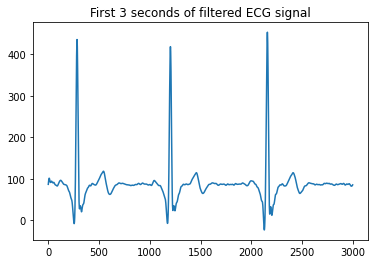

In [27]:
### TODO plot filtered signal
plt.plot(filtered, label='filtered signal')
plt.title('First 3 seconds of filtered ECG signal')
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

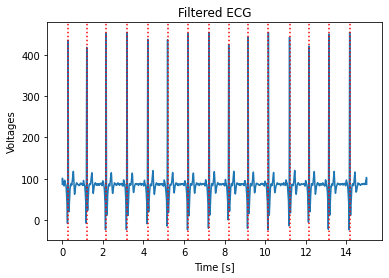

In [28]:
### TODO
# Convert the R-peak locations to seconds
time = [i/SAMPLING_RATE for i in range(len(signal))]
plt.plot(time, out['filtered'])
plt.title('Filtered ECG')
plt.xlabel('Time [s]')
plt.ylabel('Voltages')

for rpeak in out['rpeaks']:
    plt.axvline(x=rpeak/SAMPLING_RATE, color='r', ls=':')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [29]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


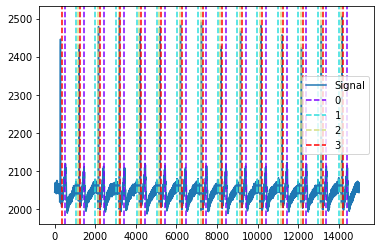

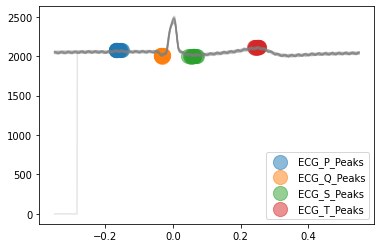

In [30]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

_, waves_peak = nk.ecg_delineate(signal, out['rpeaks'], sampling_rate=SAMPLING_RATE, method="peak")

# Plot the unfiltered signal and the delineated waves
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal)

_, wave_peak = nk.ecg_delineate(signal, 
                                 out['rpeaks'], 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [31]:
# TODO Does the detection work well?
# YES

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


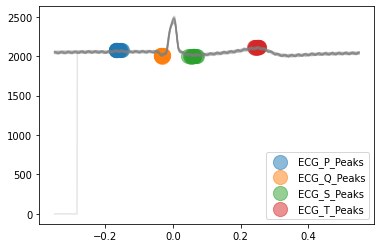

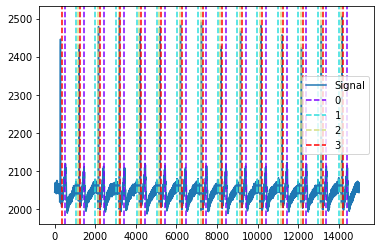

In [32]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
_, waves_peak = nk.ecg_delineate(signal, out['rpeaks'], sampling_rate=SAMPLING_RATE,show=True, method="peak",show_type='peaks')

# Plot the unfiltered signal and the delineated waves
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal)



/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


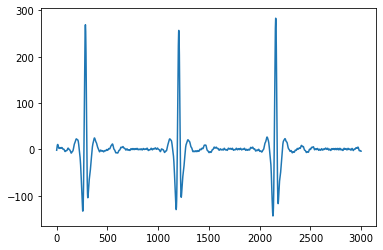

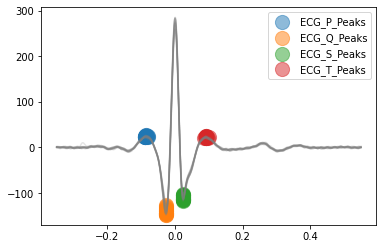

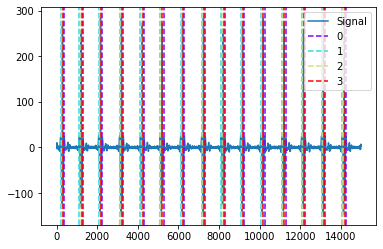

In [33]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
signal_filtered = nk.signal_filter(signal, lowcut=8, highcut=38, sampling_rate=SAMPLING_RATE, order=3)
plt.plot(signal_filtered[:3000])
_, waves_peak = nk.ecg_delineate(signal_filtered, out['rpeaks'], sampling_rate=SAMPLING_RATE, method="peak",show=True,show_type='peaks')

# Plot the unfiltered signal and the delineated waves
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal_filtered)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


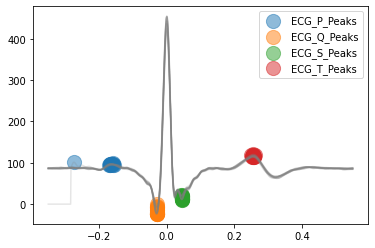

In [34]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, peaks_filtered = nk.ecg_delineate(out["filtered"], out['rpeaks'], sampling_rate=SAMPLING_RATE, method='peak', show=True)

In [35]:
# TODO Which one works the best?
# The filtered data works best in finding onset of ECG_P_Peaks and offset of ECG_T_Peaks.

In [36]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#